In [30]:
import numpy as np
import matplotlib.pyplot as plt 
import torch 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from torchvision import datasets, transforms

In [73]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [38]:
dataiter = iter(trainloader)
images, label = dataiter.next()
label.shape[0]

32

In [35]:
images[0].shape

torch.Size([1, 28, 28])

In [36]:
images[0].squeeze().shape

torch.Size([28, 28])

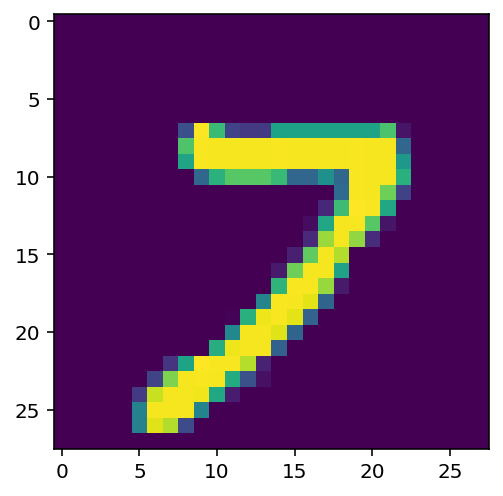

In [39]:
plt.imshow(images[0].squeeze())

In [40]:
28*28

784

In [41]:
n_input = 784
n_hidden = 256
n_output = 10 # 10 values 

In [42]:
W1 = torch.randn(n_input,n_hidden)       #784*256
b1 = torch.randn(n_hidden)               # 256

W2 = torch.randn(n_hidden,n_output)      # 256*10
b2 = torch.randn(n_output)               # 10

In [43]:
def sigmoid(z):
    return 1/(1+torch.exp(-z))

In [44]:
def softmax(z):
    z_exp = torch.exp(z)
    s = z_exp/torch.sum(z_exp,axis=1).view(-1,1)
    return s

In [46]:
images.view(32,-1).shape

torch.Size([32, 784])

In [ ]:
## Y= w.tx + b 

In [45]:
images = images.view(32,-1)

h = sigmoid(torch.mm(images,W1) + b1)

output = torch.mm(h, W2) + b2          # random values not probabilities

In [47]:
prob = softmax(output)
print(prob.shape)

torch.Size([32, 10])


In [48]:
prob

tensor([[1.7918e-01, 5.8260e-02, 1.6843e-06, 2.2774e-02, 2.8769e-06, 1.7759e-09,
         5.9241e-08, 2.4527e-10, 7.2759e-01, 1.2190e-02],
        [3.3466e-05, 3.0129e-01, 1.0375e-13, 6.9866e-01, 9.2821e-07, 1.1899e-13,
         1.2069e-14, 4.2873e-10, 1.2780e-05, 9.0431e-08],
        [5.1465e-03, 9.8571e-05, 1.4083e-08, 9.0923e-01, 8.5233e-09, 1.1226e-12,
         2.3900e-11, 1.8968e-12, 8.5515e-02, 5.6780e-06],
        [9.8289e-01, 1.5941e-02, 6.7668e-08, 1.1357e-03, 7.1464e-09, 1.0657e-12,
         5.4577e-12, 2.2523e-08, 3.6615e-05, 1.2121e-06],
        [7.9979e-01, 2.2711e-06, 1.6299e-06, 1.9987e-01, 3.1433e-05, 8.8680e-10,
         4.3178e-09, 7.6978e-12, 3.0780e-04, 8.4359e-09],
        [1.8033e-06, 9.9996e-01, 4.3426e-16, 3.1210e-09, 1.5767e-11, 3.5897e-16,
         2.8705e-13, 2.3041e-11, 3.4868e-05, 7.8718e-11],
        [7.0452e-02, 2.5901e-04, 1.2389e-11, 4.7873e-03, 4.4707e-07, 7.0432e-14,
         1.5292e-13, 7.3552e-10, 9.2450e-01, 3.0335e-09],
        [3.5385e-06, 6.0851

In [49]:
print(torch.sum(prob,axis=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [50]:
from torch import nn
import torch.nn.functional as F

In [51]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784,256)
        self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(256,10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        
        x = self.sigmoid(self.hidden(x))
        x = self.softmax(self.output(x))
        
        return x

In [15]:
class fc_3layers(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x))
        
        return x

In [53]:
#model = fc_3layers()
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

In [54]:
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)  # 32*784

logits = model.forward(images)

loss = criterion(logits,labels)
print(loss)

tensor(2.2886, grad_fn=<NllLossBackward>)


### Autograd



The loss value depends on each and every parameter in our model. That is why the autograd is able to calculate the gradients of the weights when we run backward() pass on the computed loss. 

In [55]:
print('Before backward pass: \n', model[0].weight.grad)         # gradients before backward pass

loss.backward()       # One back prop step

print('After backward pass: \n', model[0].weight.grad)          # gradients after backward pass

Before backward pass: 
 None
After backward pass: 
 tensor([[-2.2405e-04, -2.2405e-04, -2.2405e-04,  ..., -2.2405e-04,
         -2.2405e-04, -2.2405e-04],
        [ 5.1554e-03,  5.1554e-03,  5.1554e-03,  ...,  5.1554e-03,
          5.1554e-03,  5.1554e-03],
        [-7.1381e-05, -7.1381e-05, -7.1381e-05,  ..., -7.1381e-05,
         -7.1381e-05, -7.1381e-05],
        ...,
        [ 2.5505e-05,  2.5505e-05,  2.5505e-05,  ...,  2.5505e-05,
          2.5505e-05,  2.5505e-05],
        [ 1.6001e-03,  1.6001e-03,  1.6001e-03,  ...,  1.6001e-03,
          1.6001e-03,  1.6001e-03],
        [ 2.1739e-03,  2.1739e-03,  2.1739e-03,  ...,  2.1739e-03,
          2.1739e-03,  2.1739e-03]])


### Optimizers

In [56]:
from torch import optim

In [57]:
criterion = nn.NLLLoss()


In [59]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)>

In [60]:
optimizer = optim.SGD(model.parameters(),lr=0.001)        # lr = learning rate

In [61]:
print('Weights before a single optimization step:',model[0].weight)
print('Gradients:',model[0].weight.grad)

Weights before a single optimization step: Parameter containing:
tensor([[ 0.0306,  0.0079,  0.0175,  ...,  0.0245,  0.0279, -0.0174],
        [ 0.0247, -0.0052, -0.0018,  ..., -0.0294, -0.0244,  0.0329],
        [-0.0074, -0.0045,  0.0315,  ..., -0.0078,  0.0180, -0.0085],
        ...,
        [ 0.0140, -0.0321, -0.0144,  ...,  0.0185,  0.0159, -0.0352],
        [-0.0150,  0.0119, -0.0111,  ...,  0.0319,  0.0158, -0.0035],
        [ 0.0326,  0.0335,  0.0127,  ...,  0.0202,  0.0331, -0.0114]],
       requires_grad=True)
Gradients: tensor([[-2.2405e-04, -2.2405e-04, -2.2405e-04,  ..., -2.2405e-04,
         -2.2405e-04, -2.2405e-04],
        [ 5.1554e-03,  5.1554e-03,  5.1554e-03,  ...,  5.1554e-03,
          5.1554e-03,  5.1554e-03],
        [-7.1381e-05, -7.1381e-05, -7.1381e-05,  ..., -7.1381e-05,
         -7.1381e-05, -7.1381e-05],
        ...,
        [ 2.5505e-05,  2.5505e-05,  2.5505e-05,  ...,  2.5505e-05,
          2.5505e-05,  2.5505e-05],
        [ 1.6001e-03,  1.6001e-03,  1.

In [62]:
images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

logits = model(images)

optimizer.zero_grad()          # To clear the accumulator
loss = criterion(logits,labels)
print(loss)
loss.backward()


tensor(2.2930, grad_fn=<NllLossBackward>)


In [63]:
optimizer.step()         # Optimization step 


In [65]:
# W = W - lr*gradient

In [66]:
print('Weights after a single optimization step:',model[0].weight)
print('Gradients:',model[0].weight.grad)

Weights after a single optimization step: Parameter containing:
tensor([[ 0.0306,  0.0079,  0.0175,  ...,  0.0245,  0.0280, -0.0174],
        [ 0.0247, -0.0052, -0.0018,  ..., -0.0294, -0.0244,  0.0329],
        [-0.0074, -0.0045,  0.0315,  ..., -0.0078,  0.0180, -0.0085],
        ...,
        [ 0.0140, -0.0321, -0.0144,  ...,  0.0185,  0.0159, -0.0352],
        [-0.0150,  0.0119, -0.0111,  ...,  0.0319,  0.0158, -0.0035],
        [ 0.0326,  0.0335,  0.0127,  ...,  0.0202,  0.0331, -0.0114]],
       requires_grad=True)
Gradients: tensor([[-0.0055, -0.0055, -0.0055,  ..., -0.0055, -0.0055, -0.0055],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


### Training

In [67]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [68]:
criterion = nn.NLLLoss()
optimiser = optim.Adam(model.parameters(),lr=0.001)

In [69]:
len(trainloader)

1875

In [70]:
60000/32

1875.0

In [71]:
epochs = 5
for e in range(epochs):
    batch_loss = 0
    for images,labels in trainloader:
        # Flatten the images
        images = images.view(images.shape[0],-1) 
        
        # Clear the optimiser accumulator
        optimiser.zero_grad()
        
        out = model(images)      # Scores
        loss = criterion(out, labels)
        loss.backward()        # Back prop
        optimiser.step()       # Optimization step
        
        batch_loss += loss.item()   # Loss of the current batch
    else:
        print(f"Training loss: {batch_loss/len(trainloader)}")

Training loss: 0.33820600611269475
Training loss: 0.15657944871981938
Training loss: 0.11616895669562122
Training loss: 0.09638887075859433
Training loss: 0.08442370700969672


tensor(6)
tensor([[6]])


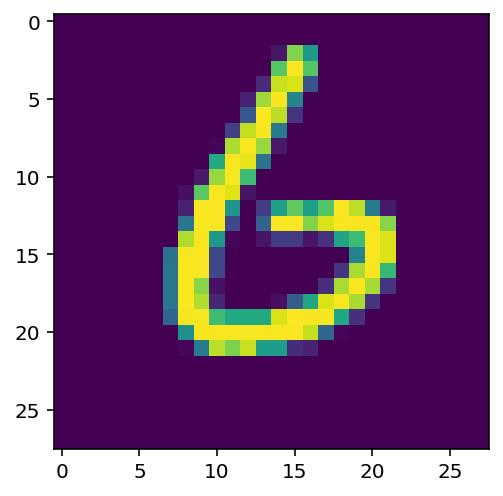

In [74]:
img, label = next(iter(testloader))
img = img[0].squeeze()
label = label[0]

out_ps = model(img.view(1,784))

probabilities = torch.exp(out_ps)
value, index = torch.topk(probabilities,k=1)
plt.imshow(img.squeeze())
print(label)
print(index)